# Проект: Исследование стартапов

## Введение

### Описание проекта
В проекте будет изучаться инвестиционный рынок и информация о сотрудниках стартапов для того, чтобы войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

### Цели и задачи проекта
- исследование инвестиционного рынка
- анализ достоверности и полноты исследуемых данных(в том числе информация о сотрудниках стартапов и ценах по типу 0-1$)
- анализ ценообразования в зависимости от категории стартапов и количества раундов финансирования перед его покупкой
- рассчет и отображение численных показателей и динамики

### Описание данных

#### Таблица `acquisition`
Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

#### Таблица `company_and_rounds`
Содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

#### Таблица `education`
Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

#### `Таблица people`
Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

#### Таблица `degrees`
Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

_____________________________________________________________________________________________________
#### Таблица `fund` (дополнительная)
Содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

#### Таблица` investment` (дополнительная)
Содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

### Содержимое проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загружаем все данные по проекту.
- Проверяем названия столбцов.
- Выводим информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [78]:
# Выгружаем необходимые библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik

In [79]:
# Выгружаем данные и создаем для них переменные
ac_df = pd.read_csv('/datasets/acquisition.csv')
c_df = pd.read_csv('/datasets/company_and_rounds.csv')
p_df = pd.read_csv('/datasets/people.csv')
ed_df = pd.read_csv('/datasets/education.csv')
d_df = pd.read_csv('/datasets/degrees.csv')
f_df = pd.read_csv('/datasets/fund.csv')
in_df = pd.read_csv('/datasets/investment.csv')

In [80]:
# Проверяем названия столбцов в датасетах
ac_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [81]:
c_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
p_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [83]:
ed_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [84]:
d_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [85]:
f_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [86]:
in_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


В данных все заголовки сошлись с заявленными, однако в датафрейме `investment` отстутствует столбец `funding_round_type`. Но данный столбец есть в датафрейме `company_and_rounds`, при дальнейшем объединении таблиц это не будет проблемой.<br>
В датафреймфх `fund` и `people` в столбце `network_username` уже видно большое количество пропусков, но это ник в социальных сетях, и возможно некоторые не хотели предоставлять подобные данные. 

In [87]:
# Выявление пропусков в таблице acquisition
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [88]:
# Изучим возможные варианты значений в столбце term_code
ac_df['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [89]:
# Посчитаем пропуски в абсолютном и относительном значениях
ac_df.isna().sum() # абсолютное значение

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [90]:
ac_df.isna().sum() / ac_df.shape[0]# относительное значение

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

Пропуски есть только в двух столбцах - `term_code` и `acquired_at`. `term_code` имеет 81% пропусков и  содержит в себе варианты расчета - cash, stock и cash_and_stock. Возможно существует и другой тип оплаты, который является пропуском в данных. `acquired_at`содержит меньше процента пропусков, и скорее всего это случайные пропуски, я бы их удалила.

In [91]:
# Выявление пропусков в таблице company_and_rounds
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [92]:
# Посчитаем пропуски в абсолютном и относительном значениях
c_df.isna().sum() # абсолютное значение

company  ID                 302
name                        302
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

In [93]:
c_df.isna().sum() / c_df.shape[0]# относительное значение

company  ID              0.001387
name                     0.001387
category  code           0.339288
status                   0.001387
founded  at              0.495091
closed  at               0.984162
domain                   0.324258
network  username        0.561316
country  code            0.501286
investment  rounds       0.001387
funding  rounds          0.001387
funding  total           0.001387
milestones               0.001387
funding  round  id       0.756959
company  id              0.756959
funded  at               0.758098
funding  round  type     0.756959
raised  amount           0.756959
pre  money  valuation    0.756959
participants             0.756959
is  first  round         0.756959
is  last  round          0.756959
dtype: float64

In [94]:
c_df['category  code'].unique()

array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

- в таблице `company_and_rounds`  уже значительно больше пропусков, они есть в каждом столбце. В последних 9 столбцах пропуски составляют 76% данных. Удалять такой объем данных небезопасно, оставляем их.
- в столбце `closed_at` пропуски составляют 98%, что может говорить о том, что компания не закрывалась - здесь пропуски являются нормой.
- в столбцах `company ID`, `status` и `name` пропусков меньше процента, эти пропуски можно смело удалить, т к их мало и это важные данные для датафрейма. 
- в столбце `category  code` пропусков 40%, думаю что пропуски в данном столбце можно заполнить значением 'other', такие значения уже есть в стобце. 
- в столбце `founded at` 50% пропусков. Данные этого столбца важны для нашего исследования.
- в столбце `domain` 32% пропусков, этот столбец отвечает за сайт компании. Думаю, эти пропуски лучше оставить как есть, на исследование они не повлияют.
- также здесь есть два схожих столбца `company  ID` и `company  id`, думаю один столбец отвечает за компанию, которую финансируют, а второй за ту, что финансирует

In [95]:
# Выявление пропусков в таблице people
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [96]:
# Посчитаем пропуски в абсолютном и относительном значениях
p_df.isna().sum() # абсолютное значение

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [97]:
p_df.isna().sum() / p_df.shape[0]# относительное значение

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

Пропуски в столбцах `first_name` и `last_name` можно удалить, их совсем мало - 5 и 1 значений соотвественно. Со столбцами `company_id` и `network_username` уже сложнее, здесь 83% и 85% пропусков соответственно. Пропуски `network_username` можно оставить без изменений, они не имеют большого значения. Удалять такой объем информации с ID компании тоже странно, не будем трогать этот столбец.

In [98]:
# Выявление пропусков в таблице education
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [99]:
# Посчитаем пропуски в абсолютном и относительном значениях
ed_df.isna().sum() # абсолютное значение

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [100]:
ed_df.isna().sum() / ed_df.shape[0]# относительное значение

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Данные в столбце `instituition` имеют меннее процента пропусков, оставим их как есть. В столбце `graduated_at` 47% пропусков, что может говорить о том, что человек еще не выпустился - оставляем.

In [101]:
# Выявление пропусков в таблице degrees
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [102]:
# Посчитаем пропуски в абсолютном и относительном значениях
d_df.isna().sum() # абсолютное значение

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [103]:
d_df.isna().sum() / d_df.shape[0]# относительное значение

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

В таблицах `degree_type` и `subject` 10% и 26% пропусков соответственно, их трогать не будем, они не оказывают существенного влияния на исследование. Данные дополнительных таблиц не будем разбирать.

В данных достаточно много пропусков, но я думаю, что исследование провести получится. Дальше будем работать с типами данных, пропусками и дубликатами.

### 1.2. Смена типов и работа с пропусками


#### `acquisition`
В данных таблицы `acquisition` все типа данных выбраны верно, однако столбец `acquired_at` лучше привести к временному типу данных.

In [104]:
# Приведение acquired_at к временному типу 
ac_df['acquired_at'] = pd.to_datetime(ac_df['acquired_at'])

In [105]:
# Проверка
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


#### company_and_rounds
В данной таблице много ошибок в типах данных, стоит проверить столбцы `status`, `funding round type` и `domain` на уникальные значения, возможно можно поменять тип на категориальный. В данных замечено два столбца с id компании - видимо один из них столбец с компанией, которую финансируют, а второй с той, что финансирует. Столбцы `company  ID`, `investment  rounds`, `funding rounds`, `funding  total`, `milestones`, `funding round id`, `company id`, `raised amount`, `pre money valuation`, `participants`, `is first round`, `is last round` стоит поменять на int64. Столбцы `founded at`, `funded at` и `closed at` стоит привести к временному типу. Также необходимо привести названия к snake case.

In [106]:
column_list = c_df.columns.tolist()
print(column_list)

['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round']


In [107]:
# Приведение к snake case
c_df = c_df.rename(columns={'company  ID': 'company_id1',
                        'category  code': 'category_code',
                        'founded  at': 'founded_at',
                        'closed  at': 'closed_at',
                        'network  username': 'network_username',
                        'country  code': 'country_code',
                        'investment  rounds': 'investment_rounds',
                        'funding  rounds': 'funding_rounds',
                        'funding  total': 'funding_total',
                        'funding  round  id': 'funding_round_id',
                        'company  id': 'company_id',
                        'funded  at': 'funded_at',
                        'funding  round  type': 'funding_round_type',
                        'raised  amount': 'raised_amount',
                        'pre  money  valuation': 'pre_money_valuation',
                        'is  first  round': 'is_first_round',
                        'is  last  round': 'is_last_round'
                       })
              

In [108]:
# Проверка статуса на уникальные значения
c_df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

In [109]:
# Проверка статуса на уникальные значения
c_df['domain'].unique()

array(['wetpaint-inc.com', 'flektor.com', 'there.com', ...,
       'flowgram.com', 'pPhotonet.co', 'Photonet.com'], dtype=object)

In [110]:
c_df['funding_round_type'].unique()

array(['series-a', 'series-b', 'series-c+', nan, 'angel', 'venture',
       'other', 'private-equity', 'post-ipo', 'crowdfunding'],
      dtype=object)

In [111]:
# Меняем тип данных на категориальный
c_df['status'] = c_df['status'].astype('category')
c_df['domain'] = c_df['domain'].astype('category')
c_df['funding_round_type'] = c_df['funding_round_type'].astype('category')

In [112]:
# Меняем тип данных на целочисленный
c_df['company_id1'] = c_df['company_id1'].astype('Int64')
c_df['investment_rounds'] = c_df['investment_rounds'].astype('Int64')
c_df['funding_rounds'] = c_df['funding_rounds'].astype('Int64')
c_df['funding_total'] = c_df['funding_total'].astype('Int64')
c_df['milestones'] = c_df['milestones'].astype('Int64')
c_df['funding_round_id'] = c_df['funding_round_id'].astype('Int64')
c_df['company_id'] = c_df['company_id'].astype('Int64')
c_df['raised_amount'] = c_df['raised_amount'].astype('Int64')
c_df['pre_money_valuation'] = c_df['pre_money_valuation'].astype('Int64')
c_df['participants'] = c_df['participants'].astype('Int64')
c_df['is_first_round'] = c_df['is_first_round'].astype('Int64')
c_df['is_last_round'] = c_df['is_last_round'].astype('Int64')

In [113]:
# Меняем тип данных на временной
c_df['founded_at'] = pd.to_datetime(c_df['founded_at'])
c_df['closed_at'] = pd.to_datetime(c_df['closed_at'])
c_df['funded_at'] = pd.to_datetime(c_df['funded_at'])

In [114]:
# Проверка
c_df.info()
c_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id1          217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  category      
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,888,1,2005-10-01,series-a,5250000,0,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,889,1,2007-01-01,series-b,9500000,0,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2312,1,2008-05-19,series-c+,25000000,0,4,1,0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,0,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,4,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


#### people 
В данной таблице необходимо только поменять тип данных на целочисленный в столбце `company_id`.

In [115]:
# Меняем тип данных на int64
p_df['company_id'] = p_df['company_id'].astype('Int64')

In [116]:
# Проверка
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


#### education
Здесь стоит поменять только столбец `graduated_at` на временной тип

In [117]:
# Меняем тип данных
ed_df['graduated_at'] = pd.to_datetime(ed_df['graduated_at'])

In [118]:
# Проверка
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


#### degrees 
Здесь проверим столбец `degree_type` на уникальные значения и поменяем тип данных на категориальный, если это нужно.

In [119]:
d_df['degree_type'].unique()

array(['MBA', 'BA', 'MS', ..., 'Master of Public Health',
       "Master's of Music", 'bachelors'], dtype=object)

In [120]:
# Меняем тип данных на категориальный
d_df['degree_type'] = d_df['degree_type'].astype('category')

In [121]:
# Проверка
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           109610 non-null  int64   
 1   object_id    109610 non-null  object  
 2   degree_type  98392 non-null   category
 3   subject      81298 non-null   object  
dtypes: category(1), int64(1), object(2)
memory usage: 3.0+ MB


Типы данных успешно изменены. Пропусков много, но провести исследование вполне реально.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Поработаем с таблицей `company_and_rounds.csv`.

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Для дальнейшей работы с таблицами необходимо заполнить пропуски в столбце `founded at`. Заполним их 01-01-2026 - таких значений нет и мы не спутаем пропуски с остальными данными.

In [122]:
# Выделим год из даты
c_df['funded_year'] = c_df['funded_at'].dt.year
#Cоставим сводную таблицу 
pivot_table = c_df.pivot_table(index = 'funded_year', values= ['funding_round_id','raised_amount'] ,aggfunc = {'raised_amount' : 'median', 'funding_round_id': 'count' }).reset_index()

pivot_table.columns = ['year', 'total_rounds', 'avg_raised_amount']
# Фильтр в 50 раундов финансирования
piv = pivot_table[pivot_table['total_rounds'] > 50]
display(piv)

,year,total_rounds,avg_raised_amount
15,1999.0,76,2000000.0
16,2000.0,125,4200000.0
17,2001.0,96,3000000.0
18,2002.0,116,4200000.0
19,2003.0,159,3000000.0
20,2004.0,291,5000000.0
21,2005.0,1633,5500000.0
22,2006.0,2436,5000000.0
23,2007.0,3279,3973320.0
24,2008.0,3774,3110000.0


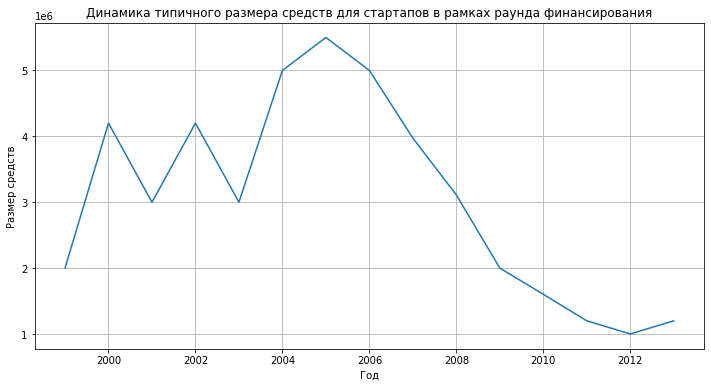

In [123]:
# Строим линейный график
piv.plot(kind = 'line',
                          x= 'year',
                          y = 'avg_raised_amount',
                          title = 'Динамика типичного размера средств для стартапов в рамках раунда финансирования',
                          xlabel = 'Год',
                          ylabel = 'Размер средств',
                          figsize  = (12,6),
                          legend = False)
plt.grid()

Пик среднего количества средств, полученных в рамках одного раунда, приходится на 2005г и составляет приблизительно 5 500 000.
С 2005г график идет вниз, однако с 2012 года делает разворот стремится вверх - собранные средства достигают 1 200 000 в 2013г. Также в 2013 году было больше всего раундов за все время - 11072. В целом число раундов росло каждый год с 1999г(76), только в 2001г(96) их было меньше, чем в 2000г.(125).


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [124]:
# Объединение таблиц
mer_df = p_df.merge(ed_df, left_on = 'id', right_on = 'person_id', how = 'left')
# Создадим столбец с пропуском в информации об образовании у сотрудников
# 1 - нет ВУЗа, 0 - есть
mer_df['ed_skip'] = mer_df['instituition'].isna().astype('int64')
mer_df

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,ed_skip
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT,0
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT,1
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT,1
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT,1
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT,1
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,<NA>,NaN,NaN,NaN,NaN,NaT,1
267690,174088,Dr. Ray,Woods,188200,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,0
267691,118386,Ricardo,Durand,143419,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,0
267692,175827,mahesh,kumar,<NA>,socialnethubs,NaN,NaN,NaN,NaT,1


In [125]:
# Разделим компании на группы по количеству сотрудников без информации об образовании
group_ed = mer_df.groupby('company_id', as_index = False).agg({'id_x' : 'nunique', 'ed_skip' : 'sum'}).sort_values(by = 'id_x', ascending = False)
group_ed.columns = ['company_id', 'total_emploees', 'ed_skip']
group_ed['ed_skipp'] = group_ed['ed_skip'] * 100 / group_ed['total_emploees']
display(group_ed)

,company_id,total_emploees,ed_skip,ed_skipp
48,59,244,76,31.147541
25,29,150,40,26.666667
777,1242,138,37,26.811594
20605,231067,72,14,19.444444
378,499,63,20,31.746032
...,...,...,...,...
10480,63585,1,1,100.000000
2432,7258,1,0,0.000000
10478,63581,1,1,100.000000
10477,63580,1,0,0.000000


In [126]:
# Распределение количества сотрудников
group_ed['total_emploees'].value_counts()

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
15         3
20         3
18         3
19         3
21         2
22         2
56         2
25         2
29         2
35         1
47         1
31         1
48         1
61         1
51         1
138        1
26         1
244        1
72         1
36         1
39         1
32         1
150        1
63         1
Name: total_emploees, dtype: int64

В предстваленных данных мало крупных компаний, большая часть компаний имеет малое количество сотрудников. Поэтому создадим категоризацию до 26 сотрудников и все, что больше 26.

In [127]:
# Категоризацию компаний
def categ_comp(value):
    if value == 1:
        return '1'
    elif value == 2:
        return '2'
    elif value == 3:
        return '3'
    elif (value == 4) | (value == 5):
        return '4-5'
    elif (value >= 6) & (value <= 10):
        return '6-10'
    elif (value >= 11) & (value <= 25):
        return '11-25'
    elif value >= 26:
        return '26+'
    
group_ed['type_company'] = group_ed['total_emploees'].apply(categ_comp)

categ_comp = group_ed.groupby('type_company').agg({'ed_skipp' : 'mean', 'total_emploees' : 'count'})

In [128]:
categ_comp.columns = ['ed_skipp_avg', 'total_companies']
categ_comp.sort_values(by = 'total_companies', ascending = False)

,ed_skipp_avg,total_companies
type_company,,
1,46.337694,18117
2,46.696198,2709
3,48.787550,921
4-5,49.796215,687
6-10,53.260438,368
11-25,45.965982,101
26+,26.838996,19


В процессе исследования были соединены таблицы `people` и `education`, таблицу `degrees` было решено не использовать, так как данных первых двух таблиц хватило для исследования.
Были выведены группы 1, 2, 3, 4-5, 6-10, 11-25 и более 26. Такая категоризация обусловлена тем, что в большинстве компаний 1-5 работников в выборке. В среднем у половины работников в каждой группе до 26 отсутствует информация об образовании, в компаниях со свыше 26 работников информация об образовании отсутствует только у 27% работников.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

 Столбец `network_username` содержится в датасетах p_df и c_df). Уберем пропуски в столбце `network_username` для исследования и посчитаем количество уникальных и неуникальных значений в нем

In [129]:
net_comp_noNA = c_df['network_username'].dropna()

display(net_comp_noNA)
display(net_comp_noNA.nunique())
display(net_comp_noNA.count())

0         BachelrWetpaint
1         BachelrWetpaint
2         BachelrWetpaint
9                Hostnine
11              getvetter
               ...       
217467            network
217468          pPhotonet
217469           Photonet
217470           Photonet
217471           Photonet
Name: network_username, Length: 95534, dtype: object

79571

95534

#network_username содержится в двух датасетах(people.csv и company_and_rounds.csv)
 уберем пропуски в столбце network_username для исследования и посчитаем количество уникальных и неуникальных значений в нем

In [130]:
net_p_noNA = p_df['network_username'].dropna()

display(net_p_noNA)
display(net_p_noNA.nunique())
display(net_p_noNA.count())

6         jobsbostontech
8             fbroulette
16        adam_beckerman
17            netcastles
18        OguzKaganAslan
               ...      
226702      peterlalonde
226705           network
226706    itechsocialnet
226707     socialnethubs
226708    esocialnetlike
Name: network_username, Length: 38867, dtype: object

38421

38867

In [131]:
set1 = set(net_comp_noNA)
set2 = set(net_p_noNA)

sets = set1.intersection(set2) 
sets = list(sets)
len(sets)

2199

В итоге у нас оказалось 2199 совпадений столбца `network_username` в таблицах `people` и `company_and_rounds`. Неуникальных значений равно, cоответственно, 38 867 и 95 534 . Соединять таблицы на основе данного столбца - плохая идея. Совпадений недостаточно.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Разделим датасет `company_and_rounds` на две таблицы и поработаем с дубликатами.

In [132]:
df_comp = c_df.loc[:, :'milestones']
df_comp = df_comp.drop_duplicates()
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id1        196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  category      
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  category      
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  Int64         
 12  milestones         196553 non-null  Int64         
dtypes: Int64(5), category(2), datetime64[ns](2),

In [133]:
df_comp = df_comp.sort_values(by = 'company_id1')
df_comp.head()

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
63280,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0,0,0,0
153920,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0,0,0,5
165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000,8
217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700000,5


In [134]:
# Таблица раундов финансирования
df_round = c_df[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_year']]

df_round = df_round.drop_duplicates()
df_round.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id           52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  category      
 4   raised_amount        52928 non-null  Int64         
 5   pre_money_valuation  52928 non-null  Int64         
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
 9   funded_year          52680 non-null  float64       
dtypes: Int64(7), category(1), datetime64[ns](1), float64(1)
memory usage: 4.4 MB


In [135]:
df_round
df_round = df_round.sort_values(by = 'funding_round_id')
df_round.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
165414,1,4,2006-12-01,series-b,8500000,0,2,0,0,2006.0
217286,2,5,2004-09-01,angel,500000,0,2,0,1,2004.0
217287,3,5,2005-05-01,series-a,12700000,115000000,3,0,0,2005.0
217288,4,5,2006-04-01,series-b,27500000,525000000,4,0,0,2006.0
202858,5,7299,2006-05-01,series-b,10500000,0,2,0,0,2006.0


В данном шаге мы разделили таблицу `company_and_rounds` на две таблицы, есть вероятность того, что изначально эта таблица не должны была быть единой - она слишком большая и логически делится на две. Теперь у нас есть две таблицы, с которыми удобно работать.


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [136]:
# Фильтруем датасет для получения необходимых компаний
filtered_df = df_comp.loc[(df_comp['funding_rounds'] > 0) | (df_comp['investment_rounds'] > 0) |
                         (df_comp['status'] == 'acquired')]
print(filtered_df)

        company_id1                     name    category_code     status  \
0                 1                 Wetpaint              web  operating   
165414            4                     Digg             news   acquired   
217286            5                Socialnet           social        ipo   
199822            7                Omnidrive  network_hosting     closed   
209255            8                  Postini              web   acquired   
...             ...                      ...              ...        ...   
152324       286183             Wedding Spot              web  operating   
152325       286184            Seldar Pharma          biotech  operating   
152326       286186               Micromidas        cleantech  operating   
152339       286200                     STWA            other  operating   
152354       286215  The Betty Mills Company        ecommerce  operating   

       founded_at  closed_at            domain network_username country_code  \
0      

In [137]:
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 152354
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id1        40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  category      
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  category      
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  Int64         
 12  milestones         40747 non-null  Int64         
dtypes: Int64(5), category(2), datetime64[ns](2), object(4)
memor

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000,8
217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,2425700000,5
199822,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,1,800000,4
209255,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0,0


In [138]:
# Пропуски в абсолютных значениях
filtered_df.isna().sum()

company_id1              0
name                     0
category_code         5432
status                   0
founded_at           12940
closed_at            38619
domain                4993
network_username     19897
country_code          6005
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

In [139]:
#В относительных
filtered_df.isna().sum()/filtered_df.shape[0]

company_id1          0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

У нас получилось отфлитровать датасет по необходимым для нас признакам. Отфильтрованный датасет состоит из 40747 строк и 13 столбцов. Пропуски в столбцах `closed_at` и `network_username` - нормальное явление, при разборе датафрейма уже упоминали их возможную природу. Пропуски в `founded_at` уже чуть более странные. В остальных случаях пропусков мало и это не повлияет на дальнейшее исследование. Данные достаточно корректные, с ними можно проводить дальнейшую работу.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Применимы ли к таким данным обычные способы нахождения типичных значений?

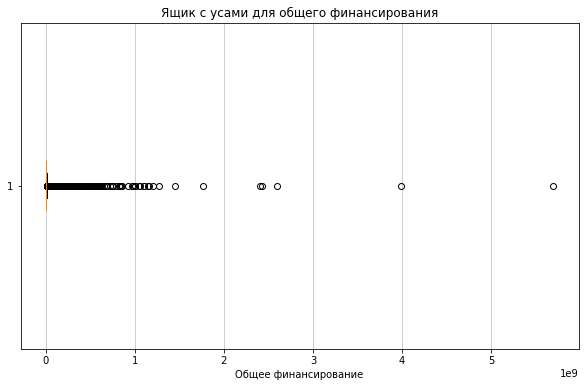

In [140]:
# Построение ящика с усами
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['funding_total'], vert=False)
plt.title('Ящик с усами для общего финансирования')
plt.xlabel('Общее финансирование')
plt.grid(axis='x', alpha=0.75)

# Отображение графика
plt.show()


In [141]:
filtered_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Text(0, 0.5, 'Количество компаний')

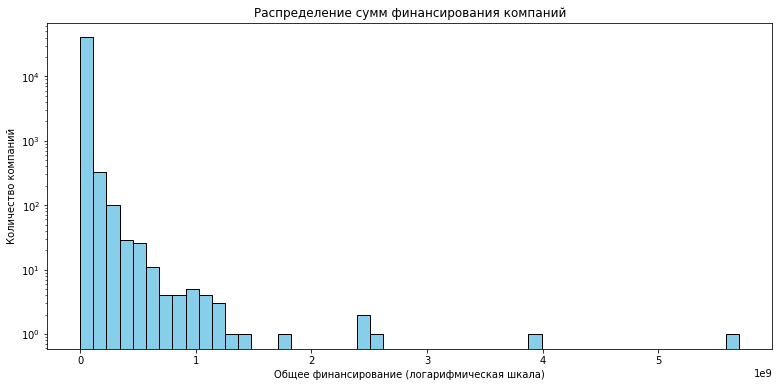

In [142]:
filtered_df['funding_total'].plot(kind = 'hist', color = 'skyblue', edgecolor = 'black', bins = 50, figsize = (13,6), title = 'Распределение сумм финансирования компаний', log = True)


plt.xlabel('Общее финансирование (логарифмическая шкала)') 
plt.ylabel('Количество компаний')

Распределение ассиметричное и имеет правый хвост, общее финансирование компаний стремится к нулю.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [143]:
# Объединим отфильтрованный датафрейм с acquisition
dff = filtered_df.merge(ac_df, how = 'left', left_on = 'company_id1', right_on = 'acquired_company_id')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id1           40890 non-null  Int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  category      
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  category      
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  Int64         
 10  funding_rounds        40890 non-null  Int64         
 11  funding_total         40890 non-null  Int64         
 12  milestones            40890 non-null  Int64         
 13  id              

In [144]:
# фильтруем покупки за 0 или 1 доллар
dfff = dff[((dff['price_amount'] == 0) | (dff['price_amount'] == 1)) & (dff['funding_total'] > 0)]
dfff.head()

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,3,16500000,4,7954.0,687.0,9.0,NaN,0.0,2012-11-28
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000,5,4283.0,20.0,13.0,NaN,0.0,2007-05-30
11,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0,3,18100000,4,2692.0,37730.0,14.0,NaN,0.0,2009-12-15
19,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0,1,45000000,5,2622.0,3396.0,23.0,NaN,0.0,2009-11-24
32,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0,4,23350000,2,5075.0,475.0,38.0,NaN,0.0,2011-01-31


In [145]:
dfff.groupby('price_amount').agg({'company_id1' : 'count', 'funding_total' : 'median'})

,company_id1,funding_total
price_amount,,
0.0,1618,6000000.0


Существует 1618 компаний, проданных за 0$

In [146]:
# Верхняя и нижняя граница выбросов для funding_total
Q1 = dfff['funding_total'].quantile(0.25)
Q3 = dfff['funding_total'].quantile(0.75)
IQR = Q3 -Q1

up = Q3 +1.5 *IQR

down = Q1- 1.5 * IQR

print(f'границы выбросов: {up}, {down}')

границы выбросов: 35750000.0, -18250000.0


In [147]:
low_perc = (dfff['funding_total'] < down).sum()/ len(dfff)* 100
high_perc = (dfff['funding_total'] > up).sum()/ len(dfff)* 100

print(f' Процент данных выше/ниже границ: {high_perc}, {low_perc}' )

 Процент данных выше/ниже границ: 9.085290482076639, 0.0


9% данных находится выше верхней границы выбросов, ниже нижней границы данных нет.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [148]:
df_cat = dff[dff['price_amount'] > 0]
df_cat.head()

,company_id1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,4,45000000,8,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0,0,0,0,419.0,59.0,8.0,cash,625000000.0,2007-07-09
6,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
10,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,4,18500000,5,5984.0,13.0,13.0,NaN,29000000.0,2009-04-01
14,18,Lala,games_video,acquired,NaT,NaT,lala.com,NaN,USA,0,4,44150000,6,2657.0,1654.0,18.0,cash_and_stock,80000000.0,2009-12-05


In [149]:
df_cat['price_amount'].describe()

count    2.473000e+03
mean     1.495976e+09
std      5.230439e+10
min      1.000000e+00
25%      1.270000e+07
50%      5.600000e+07
75%      2.650000e+08
max      2.600000e+12
Name: price_amount, dtype: float64

Разница между медианным и средним значением слишком большая, что говорит о большом количестве выбросов. Вычислим 1 и 99 процентиль и выведем датафрейм без них.

In [150]:
q_1 = df_cat['price_amount'].quantile(0.01)
q_99 = df_cat['price_amount'].quantile(0.99)

In [151]:
cat_per = df_cat[(df_cat['price_amount'] < q_99) & (df_cat['price_amount'] > q_1)]

In [152]:
cat_per['price_amount'].value_counts()

10000000.0     44
30000000.0     38
50000000.0     37
20000000.0     36
100000000.0    30
               ..
15040000.0      1
73500000.0      1
56400000.0      1
394000000.0     1
171600000.0     1
Name: price_amount, Length: 1005, dtype: int64

In [153]:
df_f = cat_per.groupby('category_code').agg(meadian_price = ('price_amount' , 'median') ,std_price = ('price_amount', 'std')).reset_index()
df_f.sort_values(by = 'meadian_price', ascending = False)

,category_code,meadian_price,std_price
2,automotive,2.400000e+09,2.581669e+09
33,sports,6.225000e+08,5.126524e+08
21,nanotech,5.840000e+08,NaN
16,manufacturing,4.185000e+08,1.071033e+09
27,real_estate,4.000000e+08,2.676302e+09
34,transportation,2.300000e+08,5.726255e+08
1,analytics,2.000000e+08,9.296774e+07
9,fashion,1.950000e+08,8.649422e+07
3,biotech,1.907300e+08,9.653069e+08
4,cleantech,1.850000e+08,8.744196e+08


В таблице выше есть NaN в `std_price`, уберем их.

In [154]:
df_1 = df_f[df_f['std_price'].notna()]
df_2 = df_1.sort_values(by = 'meadian_price', ascending = False)
df_2.head(15)

,category_code,meadian_price,std_price
2,automotive,2.400000e+09,2.581669e+09
33,sports,6.225000e+08,5.126524e+08
16,manufacturing,4.185000e+08,1.071033e+09
27,real_estate,4.000000e+08,2.676302e+09
34,transportation,2.300000e+08,5.726255e+08
1,analytics,2.000000e+08,9.296774e+07
9,fashion,1.950000e+08,8.649422e+07
3,biotech,1.907300e+08,9.653069e+08
4,cleantech,1.850000e+08,8.744196e+08
6,ecommerce,1.800000e+08,2.821530e+08


Стартапы в категориях automotive (2,4 миллиарда долларов США), sports, manufacturing и real estate имеют тенденцию к высоким ценам, превышающим 400 миллионов долларов США.

Наибольший разброс цен среди стартапов наблюдается в категориях real estate (2,676 миллиарда долларов США), automotive, health и semiconductor.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [163]:
df_3 = dff[dff['funding_rounds'] >0]
df_category = df_3.groupby('status').agg({'funding_rounds':'mean'}).reset_index()
df_category

,status,funding_rounds
0,acquired,1.897766
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


Text(0, 0.5, 'Типичное количество раундов')

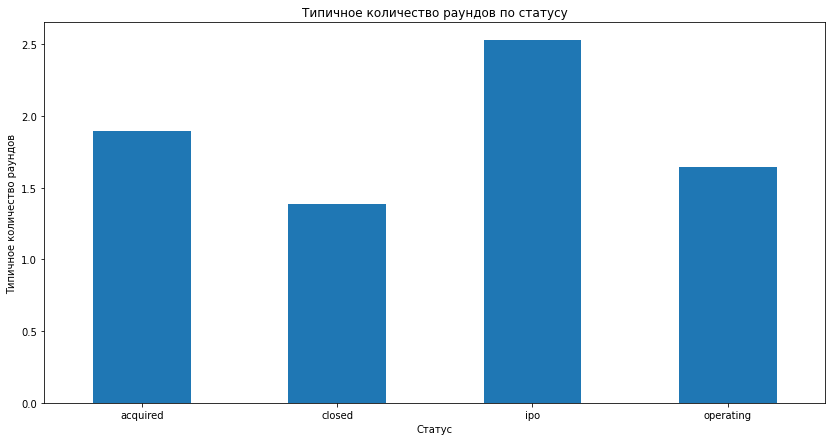

In [164]:
# Построим столбчатую диаграму на основе полученных данных
df_category.plot(kind='bar', x='status', y='funding_rounds', rot = 0, legend=False, figsize=(14, 7))

plt.title('Типичное количество раундов по статусу')
plt.xlabel('Статус')
plt.ylabel('Типичное количество раундов')

У компаний, выходящих на ipo наибольшее количество раундов финансирования, чем у приобретенных - 2 и 1, соответственно.


## Шаг 4. Итоговый вывод и рекомендации


### Этапы работы
В данной работе были предприняты следующие шаги:
- Первичное знакомство с данными(выгрузка и первичный анализ данных)
- Предобработка данных(смена типа данных, стиля написания столбцов и анализ пропусков)
- Исследоватальский анализ данных, в котором были сформулированны ответы на вопросы заказчика

### Выводы:

1. С течением времени наблюдается рост числа раундов финансирования, однако средний объем привлеченных средств снижается. Это может свидетельствовать о возрастании конкуренции и уменьшении доступности крупных инвестиций.

2. В небольших стартапах информация об уровне образования сотрудников зачастую менее полная по сравнению с крупными компаниями. Это может быть связано с меньшей формализацией процессов в стартапах, которые не всегда собирают данные о своих работниках.

3. Стартапы, проданные за символическую сумму в 0 или 1 доллар, часто имеют значительное количество привлеченного финансирования. Это может указывать на то, что такие сделки являются частью стратегических приобретений или слияний, при этом цена не отражает реальную стоимость компании.

4. Наибольший разброс цен за стартапы наблюдается в таких категориях, как недвижимость `real_estate`, автомобильная промышленность `automotive`, здравоохранение `health` и полупроводники `semiconductor`. Это может быть связано с высокими рисками и потенциальной доходностью этих инвестиций.

5. Компании, вышедшие на IPO, проходят большее количество раундов финансирования по сравнению с приобретенными компаниями. Это может быть связано с необходимостью привлечения более значительных средств для выхода на публичный рынок

### Рекомендации:

1. Обратите внимание на стартапы, которые прошли множество раундов финансирования, особенно те, которые готовятся к IPO. Такие компании могут демонстрировать большую устойчивость и потенциал для роста.

2. Рассмотрите возможность инвестирования в крупные стартапы, даже несмотря на высокие риски, поскольку они могут обеспечить значительную прибыль.

3. Информация о сотрудниках и их образовании может быть неполной, особенно в небольших стартапах. Это может повлиять на оценку потенциала компании.

4. При анализе сделок с нулевой или минимальной ценой учитывайте, что такие сделки могут быть частью стратегических приобретений, и цена не всегда отражает реальную стоимость компании.